In [15]:
import pandas as pd
import urllib3
import re
import json
import numpy as np
import networkx as nx
from melonapi import scrapeMelon
import ast
import os
import spacy
import warnings
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from tqdm import tqdm
#import translators as ts
#ts.google

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luchengliang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2>Nodes, Edges<h2>

In [22]:
rank = scrapeMelon.getList("LIVE").decode()
rank

'{"1": {"name": "사건의 지평선", "artists": "윤하 (YOUNHA)", "ranking": 1, "songId": "34819473", "albumId": "10903868"}, "2": {"name": "ANTIFRAGILE", "artists": "LE SSERAFIM (르세라핌)", "ranking": 2, "songId": "35729104", "albumId": "11078496"}, "3": {"name": "Nxde", "artists": "(여자)아이들", "ranking": 3, "songId": "35730562", "albumId": "11078852"}, "4": {"name": "Hype boy", "artists": "NewJeans", "ranking": 4, "songId": "35454426", "albumId": "11011565"}, "5": {"name": "After LIKE", "artists": "IVE (아이브)", "ranking": 5, "songId": "35546497", "albumId": "11034298"}, "6": {"name": "새삥 (Prod. ZICO) (Feat. 호미들)", "artists": "지코 (ZICO)", "ranking": 6, "songId": "35595136", "albumId": "11045985"}, "7": {"name": "Attention", "artists": "NewJeans", "ranking": 7, "songId": "35454425", "albumId": "11011565"}, "8": {"name": "Rush Hour (Feat. j-hope of BTS)", "artists": "Crush", "ranking": 8, "songId": "35665282", "albumId": "11062364"}, "9": {"name": "Monologue", "artists": "테이", "ranking": 9, "songId": "356

In [23]:
rank_dict = ast.literal_eval(rank) # Make this "string" -> "dict"

In [24]:
rank_en = dict([(key, ts.google(str(value), from_language='ko', to_language='en')) for key, value in rank_dict.items()])
rank_en['44'] = rank_en['44'] + '}'
rank_en['88'] = rank_en['88'] + '}'
rank_en

{'1': "{'Name': 'Horizon of the Incident', 'Artists': 'YOUNHA', 'Ranking': 1, 'Songid': '34819473', 'Albumid': '10903868'}",
 '2': "{'Name': 'AntiFragile', 'Artists': 'Le Sserafim', 'Ranking': 2, 'Songid': '35729104', 'Albumid': '11078496'}",
 '3': "{'Name': 'NXDE', 'Artists': '(Women)', 'Ranking': 3, 'Songid': '35730562', 'Albumid': '11078852'}",
 '4': "{'Name': 'Hype Boy', 'Artists': 'Newjeans', 'Ranking': 4, 'Songid': '35454426', 'Albumid': '11011565'}",
 '5': "{'Name': 'After Like', 'Artists': 'Ive (Ive)', 'Ranking': 5, 'Songid': '35546497', 'Albumid': '11034298'}",
 '6': "{'Name': 'Prod. Zico (Feat. Homi)', 'Artists':' Zico ',' Ranking ': 6,' Songid ':' 35595136 ',' Albumid ':' 11045985 '}",
 '7': "{'Name': 'Attension', 'Artists': 'Newjeans', 'Ranking': 7, 'Songid': '35454425', 'Albumid': '11011565'}",
 '8': "{'Name': 'Rush Hour (Feat. J-Hope of BTS)', 'Artists': 'Crush', 'Ranking': 8, 'Songid': '35665282', 'Albumid': '11062364'}",
 '9': "{'Name': 'Monologue', 'Artists': 'Tei', 'R

In [6]:
songs_df = []
for key, j in rank_en.items():
    try:
        res = re.sub('\(Women\)', '(G)I-DLE', j)
        res = re.sub('Ive \(Ive\)', 'Ive', res)
        res = re.sub('Blackpink', 'BLACKPINK', res)
        res = re.sub(' PSY ', 'PSY', res)
        res = re.sub('Itzy', 'ITZY', res)
        res = re.sub('Dreamers [Music from the FIFA WORLD CUP qatar 2022 Official Soundtrack]', 
                     'Dreamers [Music from the FIFA WORLD CUP qatar 2022 Official Soundtrack]\'', res)
        res = re.sub(' Jungkook, BTS ', 'Jungkook', res)
        res = re.sub('It\'s Love', 'It%27s Love', res)
        result = ast.literal_eval(res)
        result = {k.lower(): v for k, v in result.items()}
        songs_df.append(pd.DataFrame([result]))
    except:
        pass

song_df = pd.concat(songs_df)
#song_df = song_df.assign(**{'songID': song_df['songid'].fillna(song_df['songs'])})
#song_df = song_df.assign(**{'albumID': song_df['albumid'].fillna(song_df['albums'])})
#song_df.drop(['songid', 'albumid', 'songs', 'albums', ' ranking ', ' songid ', ' albumid '], axis=1, inplace=True)
song_df.drop([' ranking ', ' songid ', ' albumid '], axis=1, inplace=True)
song_df.dropna(axis=0, inplace=True)
song_df.set_index(np.arange(1,len(song_df)+1), inplace=True)
song_df.replace(' ', '_', regex=True, inplace=True)
song_df

NameError: name 'rank_en' is not defined

In [83]:
frames = [song_df[song_df['artists'].isin(df['Group'])], song_df[song_df['artists'].isin(df['Stage Name'])]]
df_song = pd.concat(frames, axis=0)
df_song.sort_index(inplace=True)
df_song

NameError: name 'song_df' is not defined

<h1>已蒐集完“node”資料<h1>

In [2]:
from pathlib import Path
mother_dir = Path("Rank_eachArtist")

In [3]:
#The groups we interested in (Which are in TOP 100 in Melon)
group_name = []
for name in list(mother_dir.glob("*.csv")):
    name = str(name)
    name = name.replace("Rank_eachArtist/", "")
    name = name.replace(".csv", "")
    group_name.append(name)
print(group_name)

['Aespa', 'Girls-Generation', 'Younha', 'BTS', 'ITZY', '(G)-IDLE', 'Red_Velvet', 'IU', 'Twice', 'Ive', 'Le_Sserafim', 'BLACKPINK', 'Bigbang', 'NewJeans', 'NMIXX']


In [7]:
#Each groups' dataframe
Le_Sserafim_df = Le_Sserafim_df = pd.read_csv("Rank_eachArtist/" + "Le_Sserafim" + ".csv")
if 'Unnamed: 0' in Le_Sserafim_df:
    Le_Sserafim_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Le_Sserafim_df['group'] = 'Le_Sserafim'
Le_Sserafim_df['group_wiki'] = 'le-sserafim'
    
Girls_Generation_df = pd.read_csv("Rank_eachArtist/" + "Girls-Generation" + ".csv")
if 'Unnamed: 0' in Girls_Generation_df:
    Girls_Generation_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Girls_Generation_df['group'] = 'Girls-Generation' 
Girls_Generation_df['group_wiki'] = 'girls-generation'
    
BTS_df = pd.read_csv("Rank_eachArtist/" + "BTS" + ".csv")
if 'Unnamed: 0' in BTS_df:
    BTS_df.drop(['Unnamed: 0'], axis=1, inplace=True)
BTS_df['group'] = 'BTS'
BTS_df['group_wiki'] = 'bts'
    
ITZY_df = pd.read_csv("Rank_eachArtist/" + "ITZY" + ".csv")
if 'Unnamed: 0' in ITZY_df:
    ITZY_df.drop(['Unnamed: 0'], axis=1, inplace=True)
ITZY_df['group'] = 'ITZY'
ITZY_df['group_wiki'] = 'itzy'
    
G_IDLE_df = pd.read_csv("Rank_eachArtist/" + "(G)-IDLE" + ".csv")
if 'Unnamed: 0' in G_IDLE_df:
    G_IDLE_df.drop(['Unnamed: 0'], axis=1, inplace=True)
G_IDLE_df['group'] = '(G)-IDLE'
G_IDLE_df['group_wiki'] = 'g-i-dle'
    
Red_Velvet_df = pd.read_csv("Rank_eachArtist/" + "Red_Velvet" + ".csv")
if 'Unnamed: 0' in Red_Velvet_df:
    Red_Velvet_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Red_Velvet_df['group_wiki'] = 'Red_Velvet'
Red_Velvet_df['group_wiki'] = 'redvelvet'
    
IU_df = pd.read_csv("Rank_eachArtist/" + "IU" + ".csv")
if 'Unnamed: 0' in IU_df:
    IU_df.drop(['Unnamed: 0'], axis=1, inplace=True)
IU_df['group'] = 'IU'
IU_df['group_wiki'] = 'i-u'
    
Twice_df = pd.read_csv("Rank_eachArtist/" + "Twice" + ".csv")
if 'Unnamed: 0' in Twice_df:
    Twice_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Twice_df['group'] = 'Twice'
Twice_df['group_wiki'] = 'twice'
    
Aespa_df = pd.read_csv("Rank_eachArtist/" + "Aespa" + ".csv")
if 'Unnamed: 0' in Aespa_df:
    Aespa_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Aespa_df['group'] = 'Aespa'
Aespa_df['group_wiki'] = 'aespa'
    
Ive_df = pd.read_csv("Rank_eachArtist/" + "Ive" + ".csv")
if 'Unnamed: 0' in Ive_df:
    Ive_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Ive_df['group'] = 'Ive'
Ive_df['group_wiki'] = 'ive'
    
BLACKPINK_df = pd.read_csv("Rank_eachArtist/" + "BLACKPINK" + ".csv")
if 'Unnamed: 0' in BLACKPINK_df:
    BLACKPINK_df.drop(['Unnamed: 0'], axis=1, inplace=True)
BLACKPINK_df['group'] = 'BLACKPINK'
BLACKPINK_df['group_wiki'] = 'black-pink'
    
Bigbang_df = pd.read_csv("Rank_eachArtist/" + "Bigbang" + ".csv")
if 'Unnamed: 0' in Bigbang_df:
    Bigbang_df.drop(['Unnamed: 0'], axis=1, inplace=True)
Bigbang_df['group'] = 'Bigbang'
Bigbang_df['group_wiki'] = 'bigbangkpop'
    
NewJeans_df = pd.read_csv("Rank_eachArtist/" + "NewJeans" + ".csv")
if 'Unnamed: 0' in NewJeans_df:
    NewJeans_df.drop(['Unnamed: 0'], axis=1, inplace=True)
NewJeans_df['group'] = 'NewJeans'
NewJeans_df['group_wiki'] = 'newjeans'
    
NMIXX_df = pd.read_csv("Rank_eachArtist/" + "NMIXX" + ".csv")
if 'Unnamed: 0' in NMIXX_df:
    NMIXX_df.drop(['Unnamed: 0'], axis=1, inplace=True)
NMIXX_df['group'] = 'NMIXX'
NMIXX_df['group_wiki'] = 'nmixx'

In [8]:
#Combine all the dataframes
frames = [Le_Sserafim_df, Girls_Generation_df, BTS_df, ITZY_df, 
          G_IDLE_df, Red_Velvet_df, IU_df, Twice_df, Aespa_df,
          Ive_df, BLACKPINK_df, Bigbang_df, NewJeans_df, NMIXX_df]

all_df = pd.concat(frames)
all_df.fillna(0)
#all_df.song.combine_first(all_df.Song)
#all_df.resource.combine_first(all_df.Resourse)
#all_df.drop(['Song', 'Resourse'], axis=1, inplace=True)
all_df.reset_index(inplace=True)
all_df.drop(['index'], axis=1, inplace=True)
all_df

,NO,song,resource,Web,group,group_wiki
0,1,ANTIFRAGILE_(song),Wiki_f,https://le-sserafim.fandom.com/wiki/ANTIFRAGIL...,Le_Sserafim,le-sserafim
1,2,Fearless_(Le_Sserafim_song),Wiki,NaN,Le_Sserafim,le-sserafim
2,3,impurities,NaN,NaN,Le_Sserafim,le-sserafim
3,4,Good Parts (when the quality is bad but I am),NaN,NaN,Le_Sserafim,le-sserafim
4,5,no celestial,NaN,NaN,Le_Sserafim,le-sserafim
...,...,...,...,...,...,...
203,3,Funky_Glitter_Christmas,Wiki_f,https://kpop.fandom.com/wiki/Funky_Glitter_Chr...,NMIXX,nmixx
204,4,COOL_(Your_rainbow),Wiki_f,https://nmixx.fandom.com/wiki/COOL_(Your_rainbow),NMIXX,nmixx
205,5,Kiss,Wiki_f,https://nmixx.fandom.com/wiki/Kiss,NMIXX,nmixx
206,6,TANK,Wiki_f,https://nmixx.fandom.com/wiki/TANK,NMIXX,nmixx


<h2>Wikipage Scraping<h2>

**Scrapt our data from the website**

In [2]:
http = urllib3.PoolManager()
baseurl = "https://" + "aespa" + ".fandom.com/api.php?"
action = "action=query"
title = "titles=" + "Illusion#Lyrics"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
query

'https://aespa.fandom.com/api.php?action=query&prop=revisions&rvprop=content&titles=Illusion#Lyrics&format=json'

In [102]:
http = urllib3.PoolManager()

def wiki_scr(text):
   baseurl = "https://en.wikipedia.org/w/api.php?"
   action = "action=query"
   title = "titles=" + text
   content = "prop=revisions&rvprop=content"
   dataformat = "format=json"
   
   query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
   wiki_bf(text, query)

def wiki_kpop_scr(text):
   baseurl = "https://kpop.fandom.com/api.php?"
   action = "action=query"
   title = "titles=" + text
   content = "prop=revisions&rvprop=content"
   dataformat = "format=json"

   query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
   wiki_bf(text, query)
   

def wiki_scr_kpopEach(gname, text):
   baseurl = "https://" + gname + ".fandom.com/api.php?"
   action = "action=query"
   title = "titles=" + text
   content = "prop=revisions&rvprop=content"
   dataformat = "format=json"

   query = "%s%s&%s&%s&%s" % (baseurl, action, content, title, dataformat)
   wiki_bf(text, query)
   

def wiki_bf(text, query):
   wikiresource = http.request('GET', query)
   wikijson = json.loads(wikiresource.data.decode('utf-8'))
   
   if re.search(r'/', text):
      text = text.replace("/", "\\")
    
   with open('/Users/luchengliang/Social_Graph_and_Networks/Final_Project/jsonWebpage/' + text + '.txt', 'w') as f:
      f.write(str(wikijson))

In [101]:
for i in range(len(all_df)):
   x = all_df.iloc[i, :]
   
   #Scrape different kind of wiki pages
   #First is the normal wiki
   if x['resource'] == 'Wiki':
      q = wiki_scr(x['song'])

   if x['resource'] == 'Wiki_f':
      #Second one is from Kpop fandom page, not their own page
      if '//kpop.fandom' in str(x['Web']):
         q = wiki_kpop_scr(x['song'])
      elif type(x['group_wiki']) != float:
         #Third one is from each fandom wiki page
         q = wiki_scr_kpopEach(x['group_wiki'], x['song'])
      else:
         continue

In [104]:
path = "/Users/luchengliang/Social_Graph_and_Networks/Final_Project/jsonWebpage"

dir_list = os.listdir(path)
    
print("Files: ") 
# print the list
print(dir_list)

Files: 
['Typa_Girl.txt', 'Change.txt', 'Tell_Me_Your_Wish_(Genie)_(song).txt', 'Never_Stop_Me.txt', 'Black_Swan.txt', 'Happiness.txt', 'Butter_(song).txt', 'Bang_Bang_Bang.txt', 'Dance_The_Night_Away.txt', 'Hurt.txt', 'SNEAKERS.txt', 'Lovesick_Girls.txt', 'Talk_That_Talk.txt', 'The_Truth_Untold.txt', 'Cookie.txt', 'Hype_Boy.txt', 'Oh!_(song).txt', 'Blue.txt', 'I_Need_U_(BTS_song).txt', 'In_the_morning.txt', 'Merry_%26_Happy.txt', 'After_LIKE.txt', '.DS_Store', 'Christmas_Carol_Medley.txt', 'Butterfly.txt', 'Wish_Tree.txt', 'Magic_Shop.txt', 'Not_Shy.txt', 'Like.txt', 'Twenty.txt', 'ICY.txt', 'Sour_Grapes.txt', 'Illusion.txt', 'Boy_with_Luv.txt', 'Answer:_Love_Myself.txt', 'Fantastic_Baby.txt', 'Yes_Or_Yes.txt', 'Nxde.txt', 'Anpanman.txt', 'Ice_Cream_Cake_(song).txt', 'Take_It.txt', 'Stay.txt', 'LOCO.txt', 'Dreams_Come_True.txt', 'Left_and_Right_(Feat._Jung_Kook_of_BTS).txt', 'Palette.txt', 'HWAA.txt', 'Epiphany.txt', 'Don%27t_Know_What_To_Do.txt', 'Heart_Shaker.txt', 'Luv_U.txt', 'Psy

<h1>Find Lyrics<h1>

In [9]:
all_df['lyrics'] = pd.Series(dtype='str')

In [10]:
all_df

,NO,song,resource,Web,group,group_wiki,lyrics
0,1,ANTIFRAGILE_(song),Wiki_f,https://le-sserafim.fandom.com/wiki/ANTIFRAGIL...,Le_Sserafim,le-sserafim,NaN
1,2,Fearless_(Le_Sserafim_song),Wiki,NaN,Le_Sserafim,le-sserafim,NaN
2,3,impurities,NaN,NaN,Le_Sserafim,le-sserafim,NaN
3,4,Good Parts (when the quality is bad but I am),NaN,NaN,Le_Sserafim,le-sserafim,NaN
4,5,no celestial,NaN,NaN,Le_Sserafim,le-sserafim,NaN
...,...,...,...,...,...,...,...
203,3,Funky_Glitter_Christmas,Wiki_f,https://kpop.fandom.com/wiki/Funky_Glitter_Chr...,NMIXX,nmixx,NaN
204,4,COOL_(Your_rainbow),Wiki_f,https://nmixx.fandom.com/wiki/COOL_(Your_rainbow),NMIXX,nmixx,NaN
205,5,Kiss,Wiki_f,https://nmixx.fandom.com/wiki/Kiss,NMIXX,nmixx,NaN
206,6,TANK,Wiki_f,https://nmixx.fandom.com/wiki/TANK,NMIXX,nmixx,NaN


<h3>Scrapt a single song lyrics<h3>

In [13]:
url = "https://g-i-dle.fandom.com/wiki/Nxde"
req = urllib3.PoolManager()
res = req.request('GET', url)
soup = BeautifulSoup(res.data, 'html.parser')
lyrics = soup.find_all('div', attrs={"class":"poem"})

#Become the normal lyrics
result = re.sub(r'\<(.*)\>', '', lyrics[-2].prettify())
result = re.sub(r'\n', '', result)
result = ' '.join(result.split())

#Replace Stop words
tokens = word_tokenize(result.lower())
english_stopwords = stopwords.words('english')
tokens_wo_stopwords= [t for t in tokens if t not in english_stopwords]
result = " ".join(tokens_wo_stopwords)
result = ''.join(char for char in result if char.isalnum() or char.isspace())
result = ' '.join(result.split())

result

'think bout nude cause view rude think outside box like hello name yeppi yeppi slightly dumb way talk got sexy sexy figure well tiara diamond think laugh laugh twisted lorelei need man bookworm obsessed philosophy selfmade woman flabbergasted sassy story audience booing shouting tricked liar ah undressed movie star ah night broken starlight even look tacky fall apart even loved anymore yes nude nude ddaddalatddara yes nude nude give love baby look look put beautiful self ddaddalatddara baby look look put beautiful self ddaddalatddara ouch excusezmoi sitting expecting rated r show oh sorry showing refund see direction whatever people say interest welcome throw popcorns rating inverse bliss climax feel sick prejudice made ah undressed movie star ah shameless night even look tacky perhaps even loved anymore yes nude nude ddaddalatddara yes nude nude give love baby look look put beautiful self ddaddalatddara baby look look put beautiful self ddaddalatddara um ha um ha um ha um yes nude yes

<h3>Try to get multiple songs' lyrics<h3>

In [23]:
def kpop_eachfandom_lyrics(song_name, gname):
    url = "https://" + gname + ".fandom.com/wiki/" + song_name
    req = urllib3.PoolManager()
    res = req.request('GET', url)
    soup = BeautifulSoup(res.data, 'html.parser')
    lyrics = soup.find_all('div', attrs={"class":"poem"})
    if len(lyrics) == 0:
        return "notfound"
    
    #Become the normal lyrics
    result = re.sub(r'\<(.*)\>', '', lyrics[-2].prettify())
    result = re.sub(r'\n', '', result)
    result = ' '.join(result.split())

    #Replace Stop words
    tokens = word_tokenize(result.lower())
    english_stopwords = stopwords.words('english')
    tokens_wo_stopwords= [t for t in tokens if t not in english_stopwords]
    result = " ".join(tokens_wo_stopwords)
    result = ''.join(char for char in result if char.isalnum() or char.isspace())
    result = ' '.join(result.split())
    return result


In [24]:
for i in tqdm(range(len(all_df))):
   x = all_df.iloc[i, :]
   
   if x['resource'] == 'Wiki_f':
      if '//kpop.fandom' not in str(x['Web']):
         print(x['song'])
         lyrics = kpop_eachfandom_lyrics(x['song'], x['group_wiki'])
         
         if lyrics == "notfound":
            continue
            
         all_df.loc[i, ['lyrics']] = lyrics
      else:
         continue

  0%|          | 0/208 [00:00<?, ?it/s]

ANTIFRAGILE_(song)


  0%|          | 1/208 [00:02<07:22,  2.14s/it]

Blue_Flame


  3%|▎         | 6/208 [00:04<02:09,  1.56it/s]

Sour_Grapes


  3%|▎         | 7/208 [00:05<02:28,  1.35it/s]

The_Great_Mermaid


  4%|▍         | 9/208 [00:06<02:17,  1.44it/s]

Forever_1_(song)


  6%|▌         | 12/208 [00:07<01:26,  2.26it/s]

Into_the_New_World_(song)
Gee_(song)


  6%|▋         | 13/208 [00:07<01:14,  2.61it/s]

Lion_Heart_(song)


  7%|▋         | 14/208 [00:07<01:12,  2.69it/s]

Snowy_Wish


  7%|▋         | 15/208 [00:07<01:08,  2.80it/s]

Party_(song)


  8%|▊         | 16/208 [00:08<01:27,  2.20it/s]

Tell_Me_Your_Wish_(Genie)_(song)


  8%|▊         | 17/208 [00:09<01:31,  2.10it/s]

Oh!_(song)


  9%|▊         | 18/208 [00:09<01:34,  2.01it/s]

Way_to_Go!


  9%|▉         | 19/208 [00:10<01:33,  2.01it/s]

Kissing_You_(song)


 10%|▉         | 20/208 [00:10<01:37,  1.94it/s]

That_That_(Prod._%26_Feat._SUGA_of_BTS)


 11%|█         | 22/208 [00:11<01:16,  2.42it/s]

Left_and_Right_(Feat._Jung_Kook_of_BTS)


 12%|█▏        | 25/208 [00:11<01:26,  2.11it/s]


IndexError: list index out of range

<h2>Songs that have lyrics<h2>

In [272]:
N = len(all_df[all_df['lyrics'] == 'nfind'])
nan = all_df['lyrics'].isnull().sum()

print(N)
print(nan)
print("Songs that have lyrics:", len(all_df)-N-nan)


88
38
Songs that have lyrics: 82


In [273]:
df_wLyrics = all_df[(all_df['lyrics'] != 'nfind') & (all_df['lyrics'].isna() == False)] 
df_wLyrics = df_wLyrics.reset_index()
del df_wLyrics['index']
df_wLyrics

,NO,song,resource,Web,group,group_wiki,lyrics
0,1,ANTIFRAGILE_(song),Wiki_f,https://le-sserafim.fandom.com/wiki/ANTIFRAGIL...,Le_Sserafim,le-sserafim,anti ti ti ti fragile fragile anti ti ti ti fr...
1,6,Blue_Flame,Wiki_f,NaN,Le_Sserafim,le-sserafim,colorsakuraill like ill like like coloryunjini...
2,7,Sour_Grapes,Wiki_f,NaN,Le_Sserafim,le-sserafim,colorchaewondu ru ru ru ru du du yeah colorgar...
3,9,The_Great_Mermaid,Wiki_f,NaN,Le_Sserafim,le-sserafim,colorchaewonwish never cost matter wont give o...
4,1,Forever_1_(song),Wiki_f,https://girls-generation.fandom.com/wiki/Forev...,Girls-Generation,girls-generation,forever 1 love love stopping make world beauti...
...,...,...,...,...,...,...,...
77,16,Hard_to_Love,Wiki_f,https://black-pink.fandom.com/wiki/Hard_to_Love,BLACKPINK,black-pink,color lyricsroséaint magic tool fix keep dista...
78,18,Whistle,Wiki_f,https://black-pink.fandom.com/wiki/Whistle,BLACKPINK,black-pink,div classjisoohey boydiv div classlisamake em ...
79,2,Lies,Wiki_f,https://bigbangkpop.fandom.com/wiki/Lies,Bigbang,bigbangkpop,yeah love pain dedicated brokenhearted people ...
80,4,Always_(song),Wiki_f,https://bigbangkpop.fandom.com/wiki/Always_(song),Bigbang,bigbangkpop,first day couldnt keep eyes time stopped new l...


**試驗**

In [274]:
warnings.filterwarnings("ignore")
nlp = spacy.load('en_core_web_sm')

'''
doc1 = nlp('Hello hi there!')
doc2 = nlp('Hello hi there!')
doc3 = nlp('Hey whatsup?')

print (doc1.similarity(doc2)) # 0.999999954642
print (doc2.similarity(doc3)) # 0.699032527716
print (doc1.similarity(doc3))
'''

doc1 = nlp(all_df.loc[0, ['lyrics']].item())
doc2 = nlp(all_df.loc[184, ['lyrics']].item())

print(doc1.similarity(doc2)) # 0.999999954642

0.8565656903365492


**試驗終了**

<h3>Distribution for the similarity up to 0.75-1.0 and 0.5-0.75 between each kpop songs (National)<h3>

In [1]:
warnings.filterwarnings("ignore")
nlp = spacy.load('en_core_web_sm')

G = nx.Graph()
warnings.filterwarnings("ignore")
nlp = spacy.load('en_core_web_sm')

for i in range(len(df_wLyrics)):
   doc1 = nlp(df_wLyrics.loc[i, ['lyrics']].item())
   original_node_name = df_wLyrics.loc[i, ['song']].item()
   
   if original_node_name not in list(G.nodes):
      G.add_node(original_node_name, universe = "national")
   
   for j in range(i+1, len(df_wLyrics)):
      doc2 = nlp(df_wLyrics.loc[j, ['lyrics']].item())
      new_node_name = df_wLyrics.loc[j, ['song']].item()
      
      if doc1.similarity(doc2) >= 0.75:
         #build connection
         if new_node_name in list(G.nodes):
            G.add_edge(original_node_name, new_node_name, color='r', weight=1)
         else:
            G.add_node(new_node_name, universe = "national")
            G.add_edge(original_node_name, new_node_name, color='r', weight=1)
      elif doc1.similarity(doc2) >= 0.5:
         #build connection
         if new_node_name in list(G.nodes):
            G.add_edge(original_node_name, new_node_name, color='g', weight=3)
         else:
            G.add_node(new_node_name, universe = "national")
            G.add_edge(original_node_name, new_node_name, color='g', weight=3)

NameError: name 'warnings' is not defined

In [278]:
print(G)

Graph with 81 nodes and 3088 edges


In [295]:
#print the 
count_r = 0
count_g = 0
col =nx.get_edge_attributes(G,'color')

for edge in G.edges():
    if col[edge] == 'r':
        count_r += 1
    elif col[edge] == 'g':
        count_g += 1

print("The similarity point 0.75-1.0: ", count_r)
print("The similarity point 0.5-0.75: ", count_g)

The similarity point 0.75-1.0:  2046
The similarity point 0.5-0.75:  1042


In [296]:
RG = nx.Graph( [ (u,v,d) for u,v,d in G.edges(data=True) if d['color'] == 'r'] )
GG = nx.Graph( [ (u,v,d) for u,v,d in G.edges(data=True) if d['color'] == 'g'] )

#similarity-0.75
all_rdegree = sorted(RG.degree, key=lambda x: x[1], reverse=True)
all_rdegree_nums = list(list(zip(*all_rdegree))[1])
aver_rdegree = np.average(all_rdegree_nums)
median_rdegree = np.median(all_rdegree_nums)
mode_rdegree = max(all_rdegree_nums, key=all_rdegree_nums.count)
max_rdegree = all_rdegree_nums[0]
min_rdegree = all_rdegree_nums[-1]

print("Average of 0.75-1.0 similarity's degree: " + str(aver_rdegree))
print("Median of 0.75-1.0 similarity's degree: " + str(median_rdegree))
print("Mode of 0.75-1.0 similarity's degree: " + str(mode_rdegree))
print("Maximum degree value in 0.75-1.0 similarity's degree: " + str(max_rdegree))
print("Minimum degree value in 0.75-1.0 similarity's degree: " + str(min_rdegree))

print("- - - - - - - - - - - - - - - - - - - - - -")
#similarity-0.5
all_gdegree = sorted(GG.degree, key=lambda x: x[1], reverse=True)
all_gdegree_nums = list(list(zip(*all_gdegree))[1])
aver_gdegree = np.average(all_gdegree_nums)
median_gdegree = np.median(all_gdegree_nums)
mode_gdegree = max(all_gdegree_nums, key=all_gdegree_nums.count)
max_gdegree = all_gdegree_nums[0]
min_gdegree = all_gdegree_nums[-1]

print("Average of 0.5-0.75 similarity's degree: " + str(aver_gdegree))
print("Median of 0.5-0.75 similarity's degree: " + str(median_gdegree))
print("Mode of 0.5-0.75 similarity's degree: " + str(mode_gdegree))
print("Maximum degree value in 0.5-0.75 similarity's degree: " + str(max_gdegree))
print("Minimum degree value in 0.5-0.75 similarity's degree: " + str(min_gdegree))

Average of 0.75-1.0 similarity's degree: 51.15
Median of 0.75-1.0 similarity's degree: 54.5
Mode of 0.75-1.0 similarity's degree: 67
Maximum degree value in 0.75-1.0 similarity's degree: 73
Minimum degree value in 0.75-1.0 similarity's degree: 4
- - - - - - - - - - - - - - - - - - - - - -
Average of 0.5-0.75 similarity's degree: 26.05
Median of 0.5-0.75 similarity's degree: 23.5
Mode of 0.5-0.75 similarity's degree: 12
Maximum degree value in 0.5-0.75 similarity's degree: 70
Minimum degree value in 0.5-0.75 similarity's degree: 7


<h2>Degree distribution of 0.75-1.0 similarity<h2>

Text(0.5, 1.0, '0.75-1.0 similarity degree distribution (linear)')

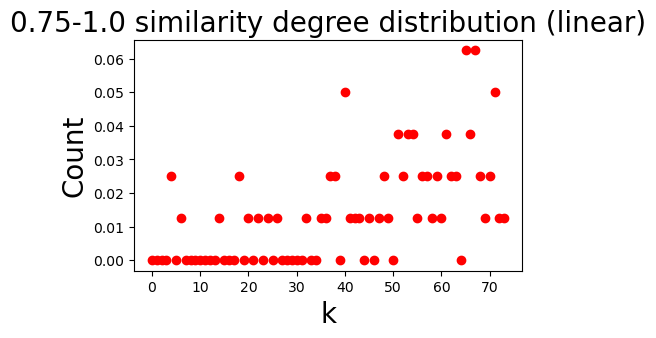

In [304]:
def degree_distribution(degs):
    maxdeg = degs[0]
    mindeg = degs[-1]
    
    kvalues= np.arange(0,maxdeg+1) # possible values of k
    count = np.zeros(maxdeg+1) # P(k)
    for k in degs:
        count[k] = count[k] + 1
    count = count/sum(count) # the sum of the elements of count(Pk) must to be equal to one
    return kvalues,count

all_rdegree = sorted(RG.degree, key=lambda x: x[1], reverse=True)
all_rdegree_nums = list(list(zip(*all_rdegree))[1])
ks_in, count_in = degree_distribution(all_rdegree_nums)

plt.figure(figsize=(5,3))
plt.plot(ks_in,count_in,'ro')
plt.xlabel("k", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("0.75-1.0 similarity degree distribution (linear)", fontsize=20)

<h2>Degree distribution of 0.5-0.75 similarity<h2>

Text(0.5, 1.0, '0.5-0.75 similarity degree distribution (linear)')

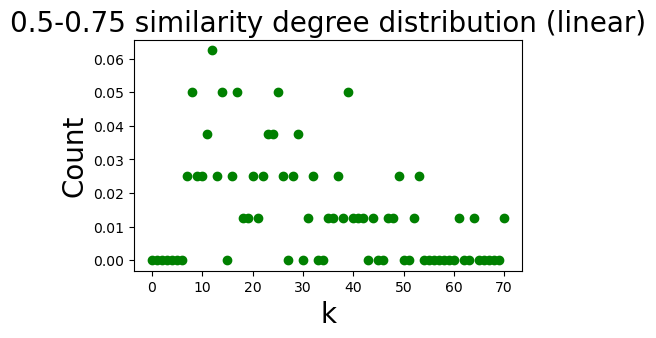

In [305]:
all_gdegree = sorted(GG.degree, key=lambda x: x[1], reverse=True)
all_gdegree_nums = list(list(zip(*all_gdegree))[1])
ks_in, count_in = degree_distribution(all_gdegree_nums)

plt.figure(figsize=(5,3))
plt.plot(ks_in,count_in,'go')
plt.xlabel("k", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("0.5-0.75 similarity degree distribution (linear)", fontsize=20)

<h2>Plot the network using the Force Atlas algorithm<h2>

In [323]:
plt.figure(figsize=(12, 4))

degrees = nx.degree(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

pos = nx.draw_kamada_kawai(G)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=5.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=pos, iterations=2000)
nx.draw_networkx_nodes(G, positions, 
                       node_size=[degrees[v] for v in G.nodes()], 
                       label=False, 
                       node_color='#D61E1E', 
                       alpha=1.0)
nx.draw_networkx_edges(G, positions, edge_color=colors, width=weights, alpha=0.1)
plt.axis('off')
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 1200x400 with 0 Axes>

<h1>Building Network<h1>

In [ ]:
#Find out the writer, producer, song writer, distributors
with open('./jsonWebpage/ANTIFRAGILE_(song).txt') as f:
    Anti = f.readlines()
    connections = re.findall(r'\|writer=[^\W_]*\|', str(Anti))
    for i in range(len(connections)):
        connections[i] = connections[i].partition('|')[0]
        connections[i] = connections[i].replace(" ", "_")
    print(set(connections))


path_dc = "/Users/luchengliang/Social_Graph_and_Networks/DC"
path_marvel = "/Users/luchengliang/Social_Graph_and_Networks/Marvel"

dir_list_dc = os.listdir(path_dc)
dir_list_marvel = os.listdir(path_marvel)

neighbors = []
#print(connections)
for j in range(len(connections)):
    for p in range(len(dir_list_dc)):
        dir_list_dc[p] = dir_list_dc[p].replace(".txt", "")
        neighbors += re.findall(dir_list_dc[p], connections[j])
        
    for u in range(len(dir_list_marvel)):
        dir_list_marvel[u] = dir_list_marvel[u].replace(".txt", "")
        neighbors += re.findall(dir_list_marvel[u], connections[j])

#print(neighbors)

<h2>Lyrics<h2>

In [ ]:
content = scrapeMelon.getLyric(35729104)
print(content)
print(type(content))

Anti ti ti ti fragile fragile
Anti ti ti ti fragile
Anti ti ti ti fragile fragile
Antifragile antifragile
가시밭길 위로 riding
you made me boost up
거짓으로 가득 찬 party
가렵지도 않아
내 뒤에 말들이 많아
나도 첨 듣는 내 rival
모두 기도해 내 falling
그 손 위로 I’mma jump in
Yes gimme that
걸어봐 위엄 like a lion
눈빛엔 거대한 desire
더 부어 gasoline on fire
불길 속에 다시 날아 rising
잊지 마 내가 두고 온 toe shoes
무슨 말이 더 필요해
무시 마 내가 걸어온 커리어
I go to ride till I die die
더 높이 가줄게
내가 바랐던 세계 젤 위에
떨어져도 돼
I’m antifragile antifragile
난 지금 on my way 갖다버려 줘
너의 fairy tale
Now you know my name
I’m antifragile antifragile
Anti ti ti ti fragile fragile
Anti ti ti ti fragile
Anti ti ti ti fragile fragile
Antifragile antifragile
“Lovey lovey lovey
dovey dovey dovey”
멋대로 정하네 나란 애에 대해
I don't know what to say
I can't feel it
뜨거운 관심은 환영
귀여운 질투는 go ahead
줄 달린 인형은 no thanks
내 미랠 쓸 나의 노래
Yes gimme that
걸어봐 위엄 like a lion
눈빛엔 거대한 desire
더 부어 gasoline on fire
불길 속에 다시 날아 rising
잊지 마 내가 두고 온 toe shoes
무슨 말이 더 필요해
무시 마 내가 걸어온 커리어
I go to ride till I die die
더 높이 가줄게
내가 바랐던 세계 젤 위에


In [ ]:
help(ts.google)

Help on method google_api in module translators.servers:

google_api(query_text: str, from_language: str = 'auto', to_language: str = 'en', **kwargs) -> Union[str, list] method of translators.servers.GoogleV2 instance
    https://translate.google.com, https://translate.google.cn.
    :param query_text: str, must.
    :param from_language: str, default 'auto'.
    :param to_language: str, default 'en'.
    :param **kwargs:
            :param reset_host_url: str, default None. eg: 'https://translate.google.fr'
            :param if_use_cn_host: boolean, default None. affected by `reset_host_url`.
            :param if_ignore_limit_of_length: boolean, default False.
            :param is_detail_result: boolean, default False.
            :param timeout: float, default None.
            :param proxies: dict, default None.
            :param sleep_seconds: float, default `random.random()`.
    :return: str or list



In [ ]:
content_trans = ts.google(content, from_language='auto', to_language='en')
print(content_trans)

Anti Ti Ti Ti fragile fragile
Anti Ti Ti Ti Fragile
Anti Ti Ti Ti fragile fragile
AntiFragile Antifragile
Riding on the thorny field road
You Made Me Boost Up
PARTY full of lies
Not itchy
There are a lot of horses behind me
My RIVAL
All prayer
I ’mma jump in that hand
Yes gimme that
Walk Dignity like a Lion
A huge desire for eyes
Pour more Gasoline on Fire
RISING flew again in the flames
Don't forget TOE Shoes I left
I need something more
The career I've walked
I go to ride till I die Die
I'll get more height
On the world gel I wanted
You can fall
I ’m Antifragile Antifragile
I'm on my way now
Your Fairy Tale
Now you know my name
I ’m Antifragile Antifragile
Anti Ti Ti Ti fragile fragile
Anti Ti Ti Ti Fragile
Anti Ti Ti Ti fragile fragile
AntiFragile Antifragile
“LOVEY LOVEY LOVEY
DOVEY DOVEY DOVEY ”
I decided to decide what it is.
I don't know what to say
I Can't Feel It
Hot interest is welcome
Cute jealousy is Go ahead
The rowing doll is No Thanks
My song to write my mirror
Yes gimme